# Anemia Detection

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import Data

In [3]:
df_raw= pd.read_csv('anemia.csv')

In [4]:
df=df_raw.copy()

In [5]:
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


## Data Processing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [7]:
df.isna().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,1421.0,0.520760,0.499745,0.0,0.0,1.0,1.0,1.0
Hemoglobin,1421.0,13.412738,1.974546,6.6,11.7,13.2,15.0,16.9
MCH,1421.0,22.905630,3.969375,16.0,19.4,22.7,26.2,30.0
MCHC,1421.0,30.251232,1.400898,27.8,29.0,30.4,31.4,32.5
MCV,1421.0,85.523786,9.636701,69.4,77.3,85.3,94.2,101.6
Result,1421.0,0.436312,0.496102,0.0,0.0,0.0,1.0,1.0


## EDA

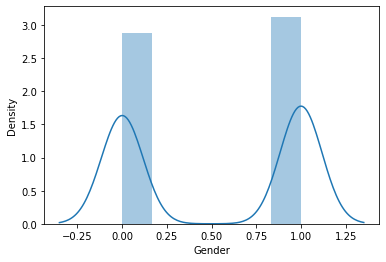

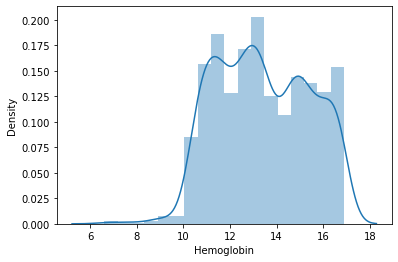

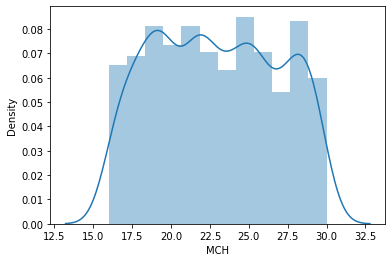

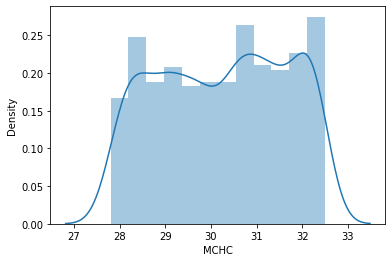

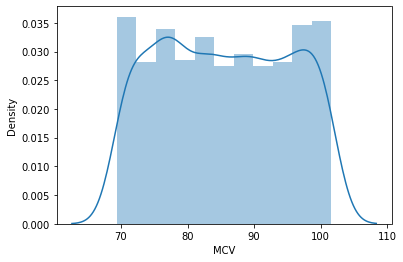

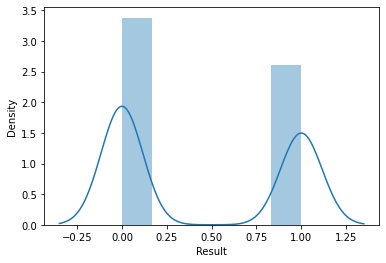

In [11]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

<AxesSubplot:>

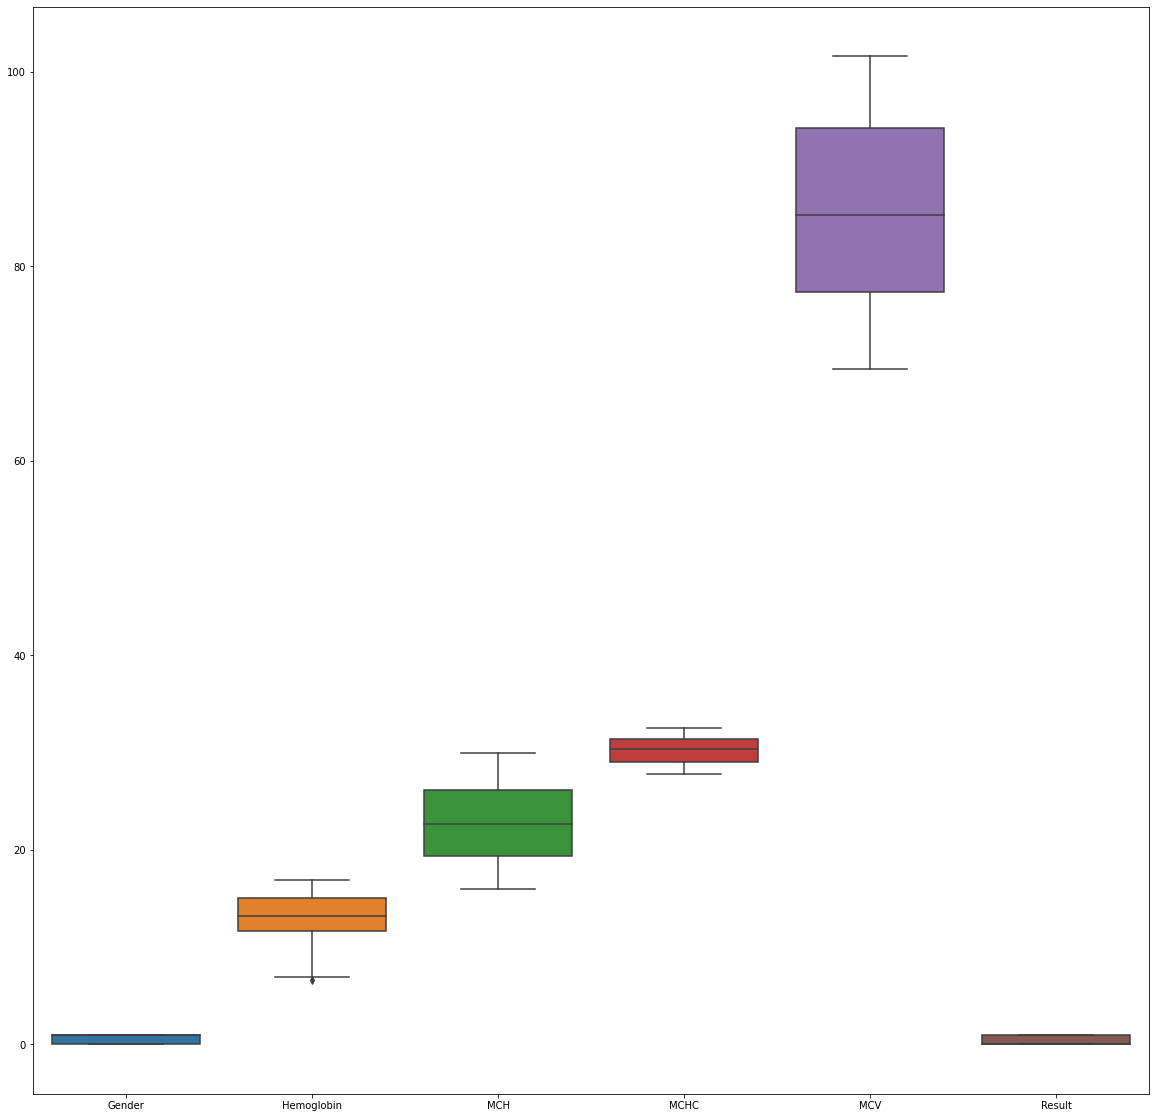

In [17]:
plt.figure(figsize=(20,20))
sns.boxplot(data=df)

In [18]:
df.shape

(1421, 6)

In [19]:
from scipy import stats

In [20]:
df=df[(np.abs(stats.zscore(df))<3).all(axis=1)]

In [21]:
df.shape

(1419, 6)

<AxesSubplot:xlabel='Result', ylabel='count'>

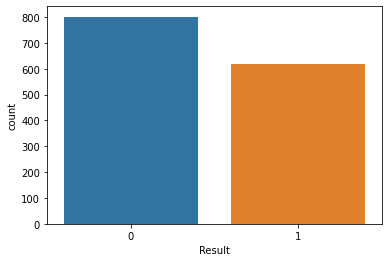

In [22]:
sns.countplot(df['Result'])

## Splitting The data

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X=df.drop('Result',axis=1)
y=df['Result']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Standerdization 

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [27]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## ML Models

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score

## LogisticRegression

In [29]:
M1=LogisticRegression()
M1.fit(X_train,y_train)
P1=M1.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P1))
print('\n')
print('classification_report')
print(classification_report(y_test,P1))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P1))
print('\n')
print('ROC Value:',roc_auc_score(y_test,P1))

confusion_matrix
[[231   4]
 [  0 191]]


classification_report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       235
           1       0.98      1.00      0.99       191

    accuracy                           0.99       426
   macro avg       0.99      0.99      0.99       426
weighted avg       0.99      0.99      0.99       426



Accuracy: 99.06103286384976


ROC Value: 0.9914893617021276


## DecisionTree

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
M2=DecisionTreeClassifier()
M2.fit(X_train,y_train)
P2=M2.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P2))
print('\n')
print('classification_report')
print(classification_report(y_test,P2))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P2))
print('\n')
print('ROC Value:',roc_auc_score(y_test,P2))

confusion_matrix
[[235   0]
 [  0 191]]


classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      1.00      1.00       191

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426



Accuracy: 100.0


ROC Value: 1.0


## Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
M3=RandomForestClassifier()
M3.fit(X_train,y_train)
P3=M3.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P3))
print('\n')
print('classification_report')
print(classification_report(y_test,P3))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P3))
print('\n')
print('ROC Value:',roc_auc_score(y_test,P3))

confusion_matrix
[[235   0]
 [  0 191]]


classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      1.00      1.00       191

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426



Accuracy: 100.0


ROC Value: 1.0


## SVM

In [34]:
from sklearn.svm import SVC

In [35]:
M4=SVC()
M4.fit(X_train,y_train)
P4=M4.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P4))
print('\n')
print('classification_report')
print(classification_report(y_test,P4))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P4))
print('\n')
print('ROC Value:',roc_auc_score(y_test,P4))

confusion_matrix
[[231   4]
 [  2 189]]


classification_report
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       235
           1       0.98      0.99      0.98       191

    accuracy                           0.99       426
   macro avg       0.99      0.99      0.99       426
weighted avg       0.99      0.99      0.99       426



Accuracy: 98.59154929577466


ROC Value: 0.9862537596078869


## KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'Error Rate')

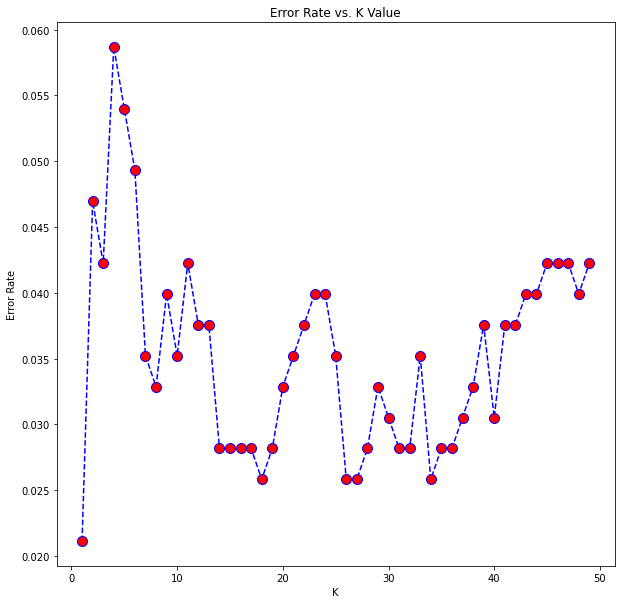

In [37]:
error_Mat=[]
for i in range (1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict_i=knn.predict(X_test)
    error_Mat.append(np.mean(predict_i != y_test))
plt.figure(figsize=(10,10))
plt.plot(range(1,50),error_Mat,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [39]:
M5=KNeighborsClassifier(n_neighbors=3)
M5.fit(X_train,y_train)
P5=M5.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P5))
print('\n')
print('classification_report')
print(classification_report(y_test,P5))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P5))
print('\n')
print('ROC Value:',roc_auc_score(y_test,P5))

confusion_matrix
[[226   9]
 [  9 182]]


classification_report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       235
           1       0.95      0.95      0.95       191

    accuracy                           0.96       426
   macro avg       0.96      0.96      0.96       426
weighted avg       0.96      0.96      0.96       426



Accuracy: 95.77464788732394


ROC Value: 0.9572908544057035


## Naive_bayes

In [40]:
from sklearn.naive_bayes import GaussianNB

In [42]:
M6=GaussianNB()
M6.fit(X_train,y_train)
P6=M6.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P6))
print('\n')
print('classification_report')
print(classification_report(y_test,P6))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P6))
print('\n')
print('ROC Value:',roc_auc_score(y_test,P6))

confusion_matrix
[[218  17]
 [ 23 168]]


classification_report
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       235
           1       0.91      0.88      0.89       191

    accuracy                           0.91       426
   macro avg       0.91      0.90      0.90       426
weighted avg       0.91      0.91      0.91       426



Accuracy: 90.61032863849765


ROC Value: 0.9036203631502729


## GradientBoostingClassifier

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
M7=GradientBoostingClassifier()
M7.fit(X_train,y_train)
P7=M7.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P7))
print('\n')
print('classification_report')
print(classification_report(y_test,P7))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P7))
print('\n')
print('ROC Value:',roc_auc_score(y_test,P7))

confusion_matrix
[[235   0]
 [  0 191]]


classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      1.00      1.00       191

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426



Accuracy: 100.0


ROC Value: 1.0


## HistGradientBoostingClassifier

In [45]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [46]:
M8=HistGradientBoostingClassifier()
M8.fit(X_train,y_train)
P8=M8.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P8))
print('\n')
print('classification_report')
print(classification_report(y_test,P8))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P8))
print('\n')
print('ROC Value:',roc_auc_score(y_test,P8))

confusion_matrix
[[235   0]
 [  0 191]]


classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      1.00      1.00       191

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426



Accuracy: 100.0


ROC Value: 1.0


## CatBoostClassifier

In [47]:
from catboost import CatBoostClassifier

In [48]:
M9=CatBoostClassifier()
M9.fit(X_train,y_train)
P9=M9.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P9))
print('\n')
print('classification_report')
print(classification_report(y_test,P9))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P9))
print('\n')
print('ROC Value:',roc_auc_score(y_test,P9))

Learning rate set to 0.010271
0:	learn: 0.6735177	total: 186ms	remaining: 3m 6s
1:	learn: 0.6569594	total: 193ms	remaining: 1m 36s
2:	learn: 0.6461187	total: 200ms	remaining: 1m 6s
3:	learn: 0.6285649	total: 206ms	remaining: 51.2s
4:	learn: 0.6067660	total: 210ms	remaining: 41.9s
5:	learn: 0.5881736	total: 215ms	remaining: 35.6s
6:	learn: 0.5708486	total: 218ms	remaining: 31s
7:	learn: 0.5570322	total: 222ms	remaining: 27.5s
8:	learn: 0.5427500	total: 225ms	remaining: 24.7s
9:	learn: 0.5227787	total: 228ms	remaining: 22.6s
10:	learn: 0.5059491	total: 232ms	remaining: 20.9s
11:	learn: 0.4871044	total: 235ms	remaining: 19.4s
12:	learn: 0.4690142	total: 239ms	remaining: 18.1s
13:	learn: 0.4548039	total: 242ms	remaining: 17s
14:	learn: 0.4412135	total: 245ms	remaining: 16.1s
15:	learn: 0.4255542	total: 248ms	remaining: 15.2s
16:	learn: 0.4107712	total: 251ms	remaining: 14.5s
17:	learn: 0.4003889	total: 253ms	remaining: 13.8s
18:	learn: 0.3869519	total: 257ms	remaining: 13.3s
19:	learn: 0.3

In [49]:
print('confusion_matrix')
print(confusion_matrix(y_test,P9))
print('\n')
print('classification_report')
print(classification_report(y_test,P9))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P9))
print('\n')
print('ROC Value:',roc_auc_score(y_test,P9))

confusion_matrix
[[235   0]
 [  0 191]]


classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      1.00      1.00       191

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426



Accuracy: 100.0


ROC Value: 1.0


## XGBClassifier

In [50]:
from xgboost import XGBClassifier

In [51]:
M10=XGBClassifier()
M10.fit(X_train,y_train)
P10=M10.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P10))
print('\n')
print('classification_report')
print(classification_report(y_test,P10))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P10))
print('\n')
print('ROC Value:',roc_auc_score(y_test,P10))

confusion_matrix
[[235   0]
 [  0 191]]


classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      1.00      1.00       191

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426



Accuracy: 100.0


ROC Value: 1.0


## LGBMClassifier

In [52]:
from lightgbm import LGBMClassifier

In [53]:
M11=LGBMClassifier()
M11.fit(X_train,y_train)
P11=M11.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P11))
print('\n')
print('classification_report')
print(classification_report(y_test,P11))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P11))
print('\n')
print('ROC Value:',roc_auc_score(y_test,P11))

confusion_matrix
[[235   0]
 [  0 191]]


classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      1.00      1.00       191

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426



Accuracy: 100.0


ROC Value: 1.0


## Neural_network

In [54]:
from sklearn.neural_network import MLPClassifier

In [56]:
M12=MLPClassifier()
M12.fit(X_train,y_train)
P12=M12.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P12))
print('\n')
print('classification_report')
print(classification_report(y_test,P12))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P12))
print('\n')
print('ROC Value:',roc_auc_score(y_test,P12))

confusion_matrix
[[233   2]
 [  2 189]]


classification_report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       235
           1       0.99      0.99      0.99       191

    accuracy                           0.99       426
   macro avg       0.99      0.99      0.99       426
weighted avg       0.99      0.99      0.99       426



Accuracy: 99.06103286384976


ROC Value: 0.990509078756823


## BaggingClassifier

In [57]:
from sklearn.ensemble import BaggingClassifier

In [59]:
M13=BaggingClassifier(base_estimator=XGBClassifier())
M13.fit(X_train,y_train)
P13=M13.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P13))
print('\n')
print('classification_report')
print(classification_report(y_test,P13))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P13))
print('\n')
print('ROC Value:',roc_auc_score(y_test,P13))

confusion_matrix
[[235   0]
 [  0 191]]


classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      1.00      1.00       191

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426



Accuracy: 100.0


ROC Value: 1.0


In [60]:
Name=['Logistic Regression','Random Forest Classifier','Decision Tree','Naive Bayes classifier', 'SVM','KNN', 
      'GBBoosting','Histogram Boosting Classifier','XGB Boosting','Light GBM',
      'CAT Boosting','Neural_Network','Bagging_classifier']
clfs= [LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier(),GaussianNB(),SVC(),KNeighborsClassifier(n_neighbors=3),
      GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1),
       HistGradientBoostingClassifier(),XGBClassifier(),LGBMClassifier(),MLPClassifier(),
       CatBoostClassifier(),BaggingClassifier(base_estimator=MLPClassifier())]

In [63]:
results=[]

for i in clfs:
    i.fit(X_train,y_train)
    score=roc_auc_score(y_test,i.predict(X_test))
    results.append(score)

Learning rate set to 0.010271
0:	learn: 0.6735177	total: 2.97ms	remaining: 2.97s
1:	learn: 0.6569594	total: 5.91ms	remaining: 2.95s
2:	learn: 0.6461187	total: 8.87ms	remaining: 2.95s
3:	learn: 0.6285649	total: 12ms	remaining: 2.99s
4:	learn: 0.6067660	total: 15ms	remaining: 2.98s
5:	learn: 0.5881736	total: 17.9ms	remaining: 2.97s
6:	learn: 0.5708486	total: 20.7ms	remaining: 2.94s
7:	learn: 0.5570322	total: 23.7ms	remaining: 2.94s
8:	learn: 0.5427500	total: 26.6ms	remaining: 2.93s
9:	learn: 0.5227787	total: 28.9ms	remaining: 2.86s
10:	learn: 0.5059491	total: 31.8ms	remaining: 2.86s
11:	learn: 0.4871044	total: 34.8ms	remaining: 2.86s
12:	learn: 0.4690142	total: 37.7ms	remaining: 2.86s
13:	learn: 0.4548039	total: 40.6ms	remaining: 2.86s
14:	learn: 0.4412135	total: 43.4ms	remaining: 2.85s
15:	learn: 0.4255542	total: 45.4ms	remaining: 2.79s
16:	learn: 0.4107712	total: 48.3ms	remaining: 2.79s
17:	learn: 0.4003889	total: 49.9ms	remaining: 2.72s
18:	learn: 0.3869519	total: 52.8ms	remaining: 2.

In [64]:
Score=pd.DataFrame(data=results,index=Name)
Score.columns=['Accuracy']

In [65]:
Score.sort_values(by='Accuracy',ascending=False)

,Accuracy
Random Forest Classifier,1.000000
Decision Tree,1.000000
GBBoosting,1.000000
Histogram Boosting Classifier,1.000000
XGB Boosting,1.000000
Light GBM,1.000000
Neural_Network,1.000000
Logistic Regression,0.991489
CAT Boosting,0.990509
Bagging_classifier,0.990509
